In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv("house_prices.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# Drop some columns that we wont be using
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [6]:
df2.shape

(13320, 5)

In [7]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

### Data Cleaning

In [8]:
df2.isnull().sum()
# we notice that we have 73 missing values for the number of bathrooms. We can either drop the NaN rows or fill
# the missing values with the mean

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# we drop the columns using df.dropna() and saving it in df3
df3 = df2.dropna()
df3.isnull().sum()
# using .isnull().sum() we can see that the number of rows with missing values is 0

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
# .shape not .shape()
df3.shape

(13246, 5)

In [11]:
# we use the .unique() method to determine the unique values of the column 'size' as we notice diferent kinds
# of values. In this case, '4 Bedroom' and '4 BHK' are essentially the same thing
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/Users/jesussalazar/ml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df3.head()

location       size total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK       1056   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00         4
2               Uttarahalli      3 BHK       1440   2.0   62.00         3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00         3
4                  Kothanur      2 BHK       1200   2.0   51.00         2

In [14]:
df3['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
# We check for outliers in 43 bedroom houses
df3[df3['bedrooms']>20]

location        size total_sqft  bath  price  bedrooms
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0        27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0        43

In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
df3.shape

(13246, 6)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)]
# the incoming data is not uniform

location   size   total_sqft  bath    price  bedrooms
30              Yelahanka  4 BHK  2100 - 2850   4.0  186.000         4
122                Hebbal  4 BHK  3067 - 8156   4.0  477.000         4
137    8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005         2
165              Sarjapur  2 BHK  1145 - 1340   2.0   43.490         2
188              KR Puram  2 BHK  1015 - 1540   2.0   56.800         2
...                   ...    ...          ...   ...      ...       ...
12975          Whitefield  2 BHK   850 - 1060   2.0   38.190         2
12990      Talaghattapura  3 BHK  1804 - 2273   3.0  122.000         3
13059              Harlur  2 BHK  1200 - 1470   2.0   72.760         2
13265               Hoodi  2 BHK  1133 - 1384   2.0   59.135         2
13299          Whitefield  4 BHK  2830 - 2882   5.0  154.500         4

[190 rows x 6 columns]

In [20]:
# define a function to convert the sqft from a range to a number
def convert_sqft_to_num(x):
    numbers = x.split('-')
    if len(numbers)==2:
        return (float(numbers[0])+float(numbers[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('1123')

1123.0

In [22]:
df4 = df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

location       size  total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2

In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bedrooms              4
Name: 30, dtype: object

In [24]:
df4.head()

location       size  total_sqft  bath   price  bedrooms
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2

### Feature Engineering

In [25]:
df5 = df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
# we multiply price with 100000. For the sake of the problem, the currency is in hundreds of thousands of...
df5.head()

location       size  total_sqft  bath   price  bedrooms  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [26]:
df5.shape

(13246, 7)

In [27]:
# We wil explore the location, a categorical feature. How many unique locations exist? How many rows per location?
# If we have too many locations, it can be a problem
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
# the amount of unique locations
len(df5['location'].unique())

1304

In [29]:
# We use the strip function to remove any space (left or right) in the information
df5['location']=df5['location'].apply(lambda x: x.strip())

In [30]:
# Change the amount of max rows displayed by pandas
pd.set_option('display.max_rows',20)

In [31]:
# We group the dataframe by location, display the column location, count it and sort values descending
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [32]:
# The type of the data displayed above
type(location_stats)

pandas.core.series.Series

In [33]:
len(location_stats)

1293

In [34]:
len(location_stats[location_stats<=10])

1052

In [35]:
len(location_stats[location_stats>10])

241

In [36]:
location_stats_less10 = location_stats[location_stats<=10]
location_stats_less10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [37]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less10 else x)

In [38]:
len(df5['location'].unique())

242

In [39]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Thyagaraja Nagar        11
HAL 2nd Stage           11
Tindlu                  11
Pattandur Agrahara      11
Nehru Nagar             11
Name: location, Length: 242, dtype: int64

In [40]:
df5.head(10)

location       size  total_sqft  bath   price  bedrooms  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2   
5                Whitefield      2 BHK      1170.0   2.0   38.00         2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00         4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00         4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25         3   
9                     other  6 Bedroom      1020.0   6.0  370.00         6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

### Outlier Detection and Removal

In [41]:
# We check for typical values of total_sqft/bedrooms
# example:
# 1000/2 = 500 # sqft/bedroom
# 2600/4 = 600
# 1300/4 = 400

In [42]:
df5[df5['total_sqft']/df5['bedrooms']<300].head()

location       size  total_sqft  bath  price  bedrooms  \
9                 other  6 Bedroom      1020.0   6.0  370.0         6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0         8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0         6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0         8   
70                other  3 Bedroom       500.0   3.0  100.0         3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [43]:
df5.shape

(13246, 7)

In [44]:
df6 = df5[~(df5['total_sqft']/df5['bedrooms']<300)]
df6.shape

(12502, 7)

In [45]:
df6['price_per_sqft'].describe()
# we see that we have extremely min and max values (200 & 176470)

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [51]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [52]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [76]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bedrooms==2)]
    bhk3 = df[(df.location==location)&(df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 Bedrooms',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 Bedrooms',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend(loc=2, prop={'size': 20})

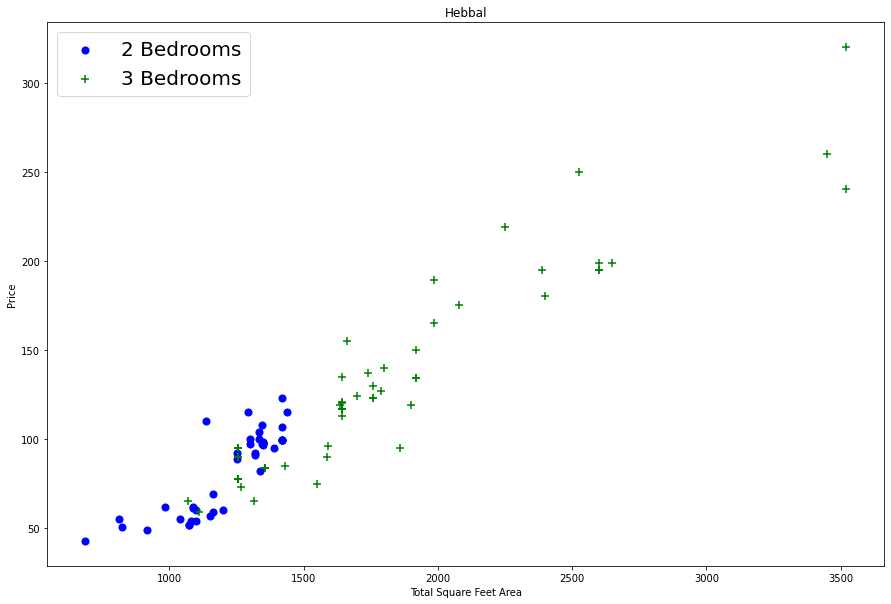

In [77]:
plot_scatter_chart(df7,"Hebbal")

In [78]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([]) # Declaro arreglo vacio
    for location,location_df in df.groupby('location'):
        bedroom_stats = {} # Declaro diccionario vacio
        for bedroom,bedroom_df in location_df.groupby('bedrooms'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom,bedroom_df in location_df.groupby('bedrooms'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [79]:
df8 = remove_bedroom_outliers(df7)
df8.shape

(7329, 7)

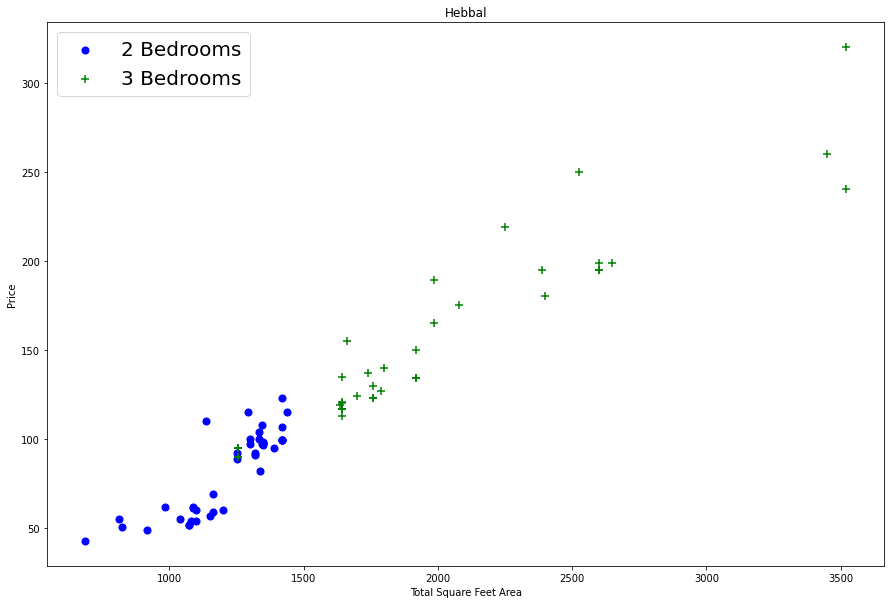

In [80]:
plot_scatter_chart(df8,"Hebbal")